# Load packages and libraries

In [1]:
.libPaths()
.libPaths(new = c("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"))
.libPaths()
# sessionInfo()

Sys.setenv(RETICULATE_PYTHON="/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/bin/python")
library(reticulate)
reticulate::use_python("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/bin/python")
reticulate::use_condaenv("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF")
reticulate::py_module_available(module='leidenalg')
reticulate::import('leidenalg')
suppressMessages(library("optparse"))
suppressMessages(library(hdf5r))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(EnsDb.Hsapiens.v86))
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))
suppressMessages(library(Matrix))
suppressMessages(library(data.table))
suppressMessages(library(ggpubr))
suppressMessages(library(ggplot2))
suppressMessages(library(scDblFinder))
suppressMessages(library("tidyr"))
suppressMessages(library("tibble"))
suppressMessages(library("biovizBase"))
suppressMessages(library("patchwork"))
suppressMessages(library(glmGamPoi))


[1] "/home/manuel.tardaguila/R/x86_64-conda-linux-gnu-library/4.3"    
[2] "/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"

[1] "/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"

[1] TRUE

Module(leidenalg)

Warning message:
“package ‘optparse’ was built under R version 4.3.3”
Warning message:
“package ‘Seurat’ was built under R version 4.3.2”
Warning message:
“package ‘Signac’ was built under R version 4.3.2”
Warning message:
“package ‘ensembldb’ was built under R version 4.3.2”
Warning message:
“package ‘BiocGenerics’ was built under R version 4.3.2”
Warning message:
“package ‘GenomicRanges’ was built under R version 4.3.2”
Warning message:
“package ‘S4Vectors’ was built under R version 4.3.2”
Warning message:
“package ‘IRanges’ was built under R version 4.3.2”
Warning message:
“package ‘GenomeInfoDb’ was built under R version 4.3.2”
Warning message:
“package ‘GenomicFeatures’ was built under R version 4.3.2”
Warning message:
“package ‘AnnotationDbi’ was built under R version 4.3.2”
Warning message:
“package ‘Biobase’ was built under R version 4.3.2”
Warning message:
“package ‘AnnotationFilter’ was built under R version 4.3.2”
Warning message:
"package 'scDblFinder' was built under R ver

## Read the merged object filtered for doublets and clusterized at high resolution

In [3]:
setwd("/scratch/manuel.tardaguila/hESC_MK_SCRNAseq_10X/no_competition/processing_outputs/")

In [4]:
adata<-readRDS(file="merged_unprocessed_db_filt_clustered.rds")

In [9]:
adata

An object of class Seurat 
101853 features across 36785 samples within 3 assays 
Active assay: SCT (29079 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 2 other assays present: RNA, RNA_raw
 2 dimensional reductions calculated: pca, umap.rna

## Check initial metadata

In [5]:
metadata<-adata[[]]

In [6]:
cat("metadata_0\n")
cat(str(metadata))
cat("\n")
cat(str(row.names(metadata)))
cat("\n")


metadata_0
'data.frame':	36785 obs. of  15 variables:
 $ orig.ident            : chr  "MCO_01373_3GEX" "MCO_01373_3GEX" "MCO_01373_3GEX" "MCO_01373_3GEX" ...
 $ nCount_RNA            : num  1305 10226 1422 10351 9980 ...
 $ nFeature_RNA          : int  507 4006 694 4260 4098 4324 659 262 4226 3131 ...
 $ nCount_RNA_raw        : num  2539 10319 2177 10443 10051 ...
 $ nFeature_RNA_raw      : int  1356 4006 1152 4260 4098 4324 1105 774 4226 3153 ...
 $ percent.mt            : num  0 3.98 0 4.04 2.87 ...
 $ scDblFinder.class     : chr  "singlet" "singlet" "singlet" "singlet" ...
 $ scDblFinder.score     : num  0.0625 0.1963 0.0402 0.2589 0.1487 ...
 $ scDblFinder.weighted  : num  0.1236 0.3591 0.0902 0.5162 0.122 ...
 $ scDblFinder.cxds_score: num  1.55e-36 8.67e-03 2.45e-139 1.98e-13 1.72e-01 ...
 $ Diff                  : chr  "Diff_MK_non_competition" "Diff_MK_non_competition" "Diff_MK_non_competition" "Diff_MK_non_competition" ...
 $ nCount_SCT            : num  8738 10226 8600 10347 

# Graphs of clusterization

In [7]:
path_QC = paste("/group/soranzo/manuel.tardaguila/2025_hESC_MK_SCRNAseq_10X/no_competition/",'QC','/',sep='')
  
  if (file.exists(path_QC)){
    
    
  }else{
    
    dir.create(file.path(path_QC))
    
  }#path_processing_outputs

In [8]:
 path_graphs = paste(path_QC,'graphs','/',sep='')
  
  if (file.exists(path_graphs)){
    
    
  }else{
    
    dir.create(file.path(path_graphs))
    
  }#path_processing_outputs

## Graph WNN by SampleID

png 
  2

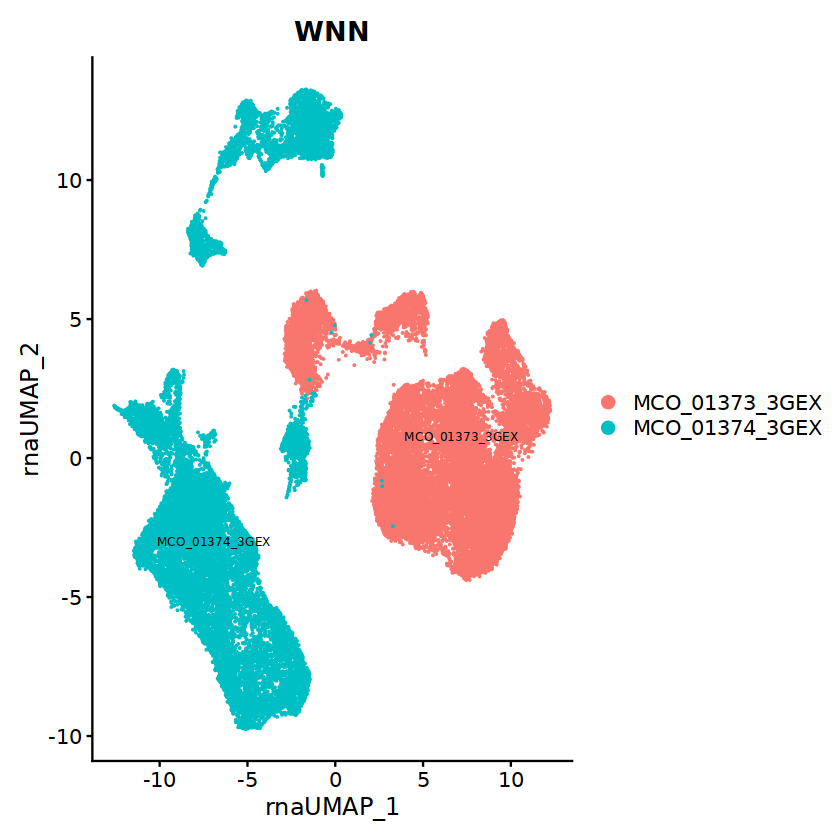

In [10]:
p3 <- DimPlot(adata, reduction = "umap.rna", group.by = "orig.ident", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")
p3  & theme(plot.title = element_text(hjust = 0.5))

setwd(path_graphs)
png(file='WNN_by_SampleID.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

## Graph WNN by Seurat cluster

png 
  2

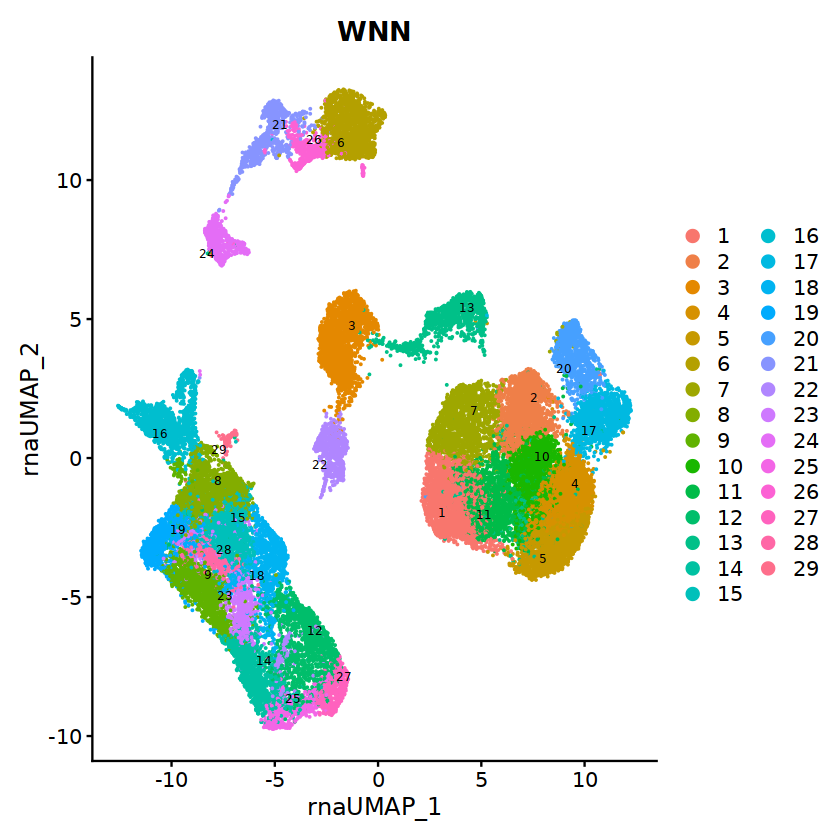

In [11]:
p3 <- DimPlot(adata, reduction = "umap.rna", group.by = "seurat_clusters", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")
p3  & theme(plot.title = element_text(hjust = 0.5))

setwd(path_graphs)
png(file='WNN_by_Seurat_cluster.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

## Graph WNN_Intermediate_QC_metrics

png 
  2

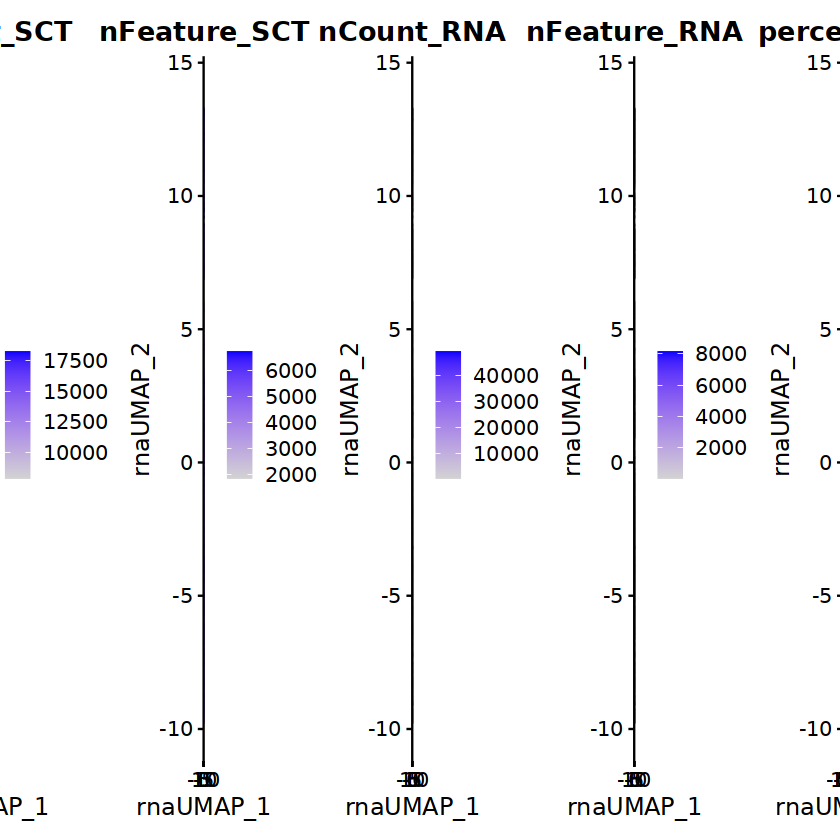

In [14]:
p6 <- FeaturePlot(adata, features = c("nCount_SCT","nFeature_SCT",
                                      "nCount_RNA", "nFeature_RNA", 
                                      'percent.mt'), ncol = 5,
                  reduction = 'umap.rna')

p6

setwd(path_graphs)
png(file='WNN_Intermediate_QC_metrics.png', width =1500, height = 500)
p6
dev.off()

## Graph WNN by marker genes

In [15]:
DefaultAssay(adata) <- 'SCT'

genes<-Features(adata)

str(genes)

 chr [1:29079] "MIR1302-2HG" "AL627309.1" "AL627309.3" "AL627309.5" ...


In [16]:
genes[grep("GZM", genes)]

[1] "GZMA" "GZMM"

In [17]:
genes[grep("IFNG", genes)]

[1] "IFNGR1"   "IFNG-AS1" "IFNGR2"

Warning message:
"No layers found matching search pattern provided"
Warning message:
"Could not find CXCR6 in the default search locations, found in 'RNA_raw' assay instead"
Warning message:
"No layers found matching search pattern provided"
Warning message:
"Could not find GZMB in the default search locations, found in 'RNA_raw' assay instead"
Warning message:
"All cells have the same value (0) of "rnaraw_GZMB""


png 
  2

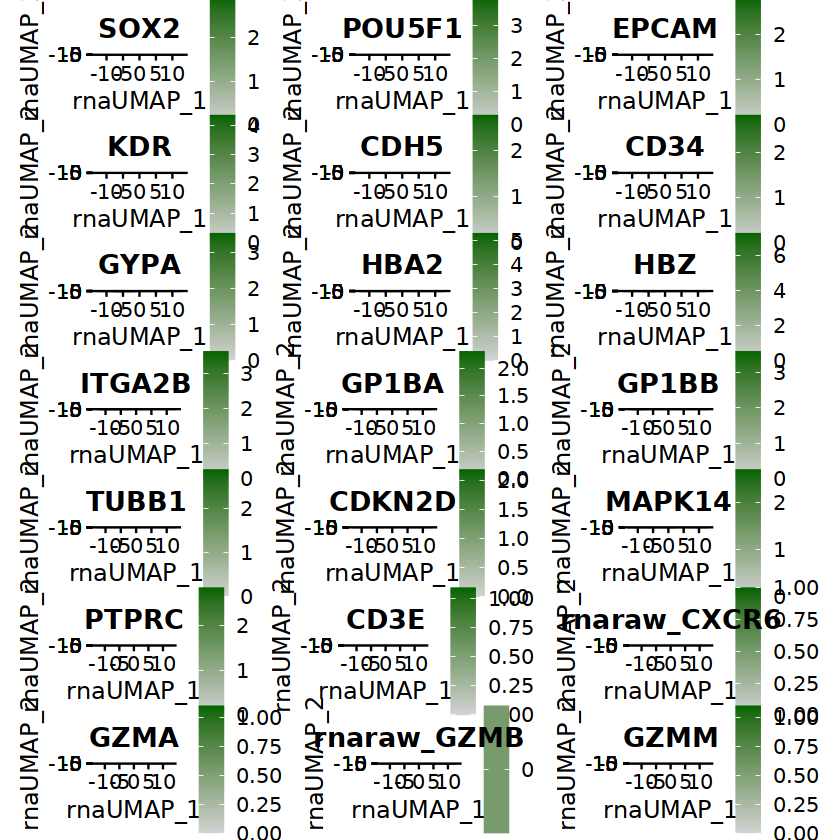

In [18]:
## Graph 

DefaultAssay(adata) <- 'SCT'


p5 <- FeaturePlot(adata, features = c('SOX2','POU5F1','EPCAM'),
                  reduction = 'umap.rna', 
                  cols = c("lightgrey","darkgreen"), ncol = 3)

p5_B <- FeaturePlot(adata, features = c("KDR",'CDH5','CD34'),
                  reduction = 'umap.rna', 
                  cols = c("lightgrey","darkgreen"), ncol = 3)
p5_1 <- FeaturePlot(adata, features = c('GYPA','HBA2','HBZ'),
                    reduction = 'umap.rna', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p5_3 <- FeaturePlot(adata, features = c('ITGA2B','GP1BA', 'GP1BB'),
                    reduction = 'umap.rna', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p_6 <- FeaturePlot(adata, features = c('TUBB1','CDKN2D','MAPK14'),
                    reduction = 'umap.rna', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p_7 <- FeaturePlot(adata, features = c('PTPRC','CD3E','CXCR6'),
                    reduction = 'umap.rna', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p_8 <- FeaturePlot(adata, features = c('GZMA','GZMB','GZMM'),
                    reduction = 'umap.rna', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p5 / p5_B / p5_1 / p5_3 / p_6 / p_7 / p_8

setwd(path_graphs)
png(file='UMAP_marker_genes.png', width =1000, height = 1750)
p5 / p5_B / p5_1 / p5_3 / p_6 / p_7 / p_8
dev.off()

# Violin graphs to decide if a cluster is lowQuality

## Percent.mt

png 
  2

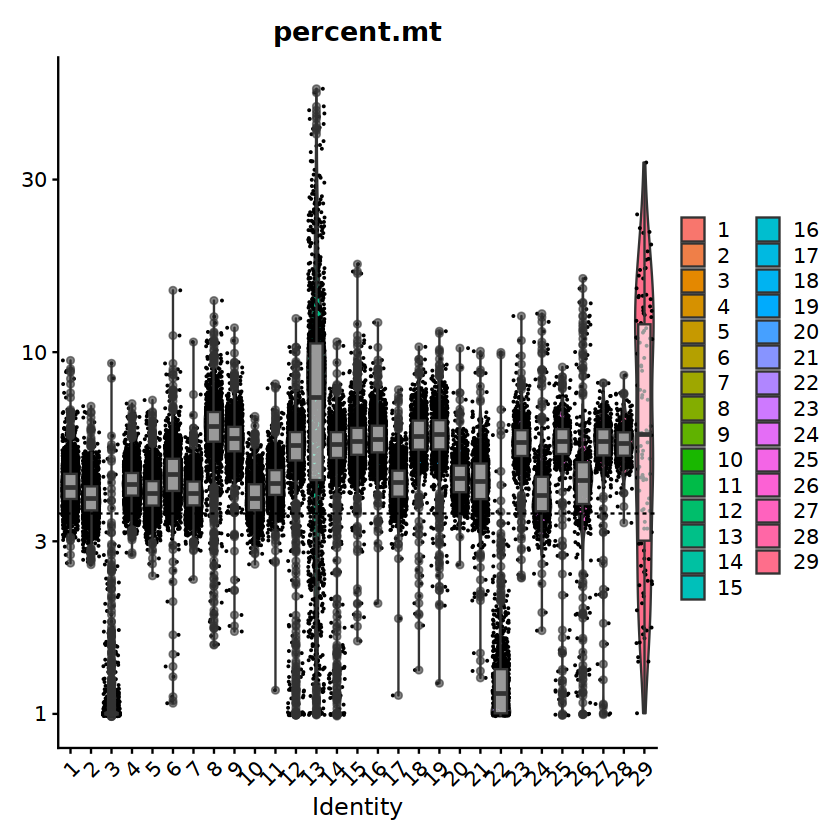

In [19]:
p10 <- VlnPlot(adata, features='percent.mt', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$percent.mt), linetype='dashed')


p10
setwd(path_graphs)
png(file='Vln_percent.mt.png', width =2000, height = 500)
p10
dev.off()

## nCount_SCT

png 
  2

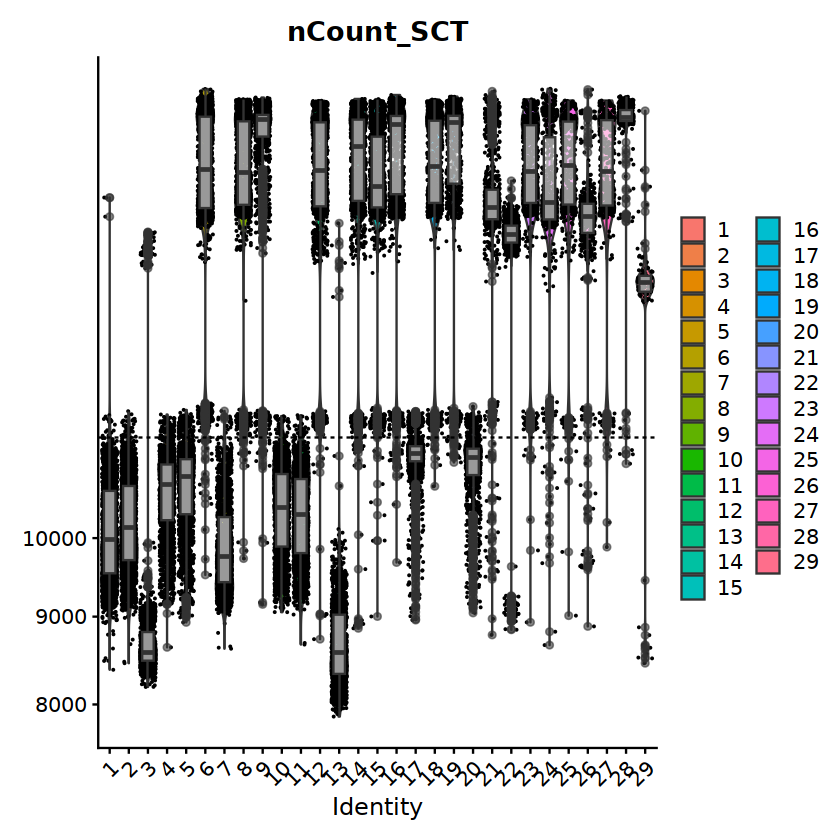

In [21]:
p10 <- VlnPlot(adata, features='nCount_SCT', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$nCount_SCT), linetype='dashed')


p10
setwd(path_graphs)
png(file='Vln_nCount_SCT.png', width =2000, height = 500)
p10
dev.off()

## nFeature_SCT

png 
  2

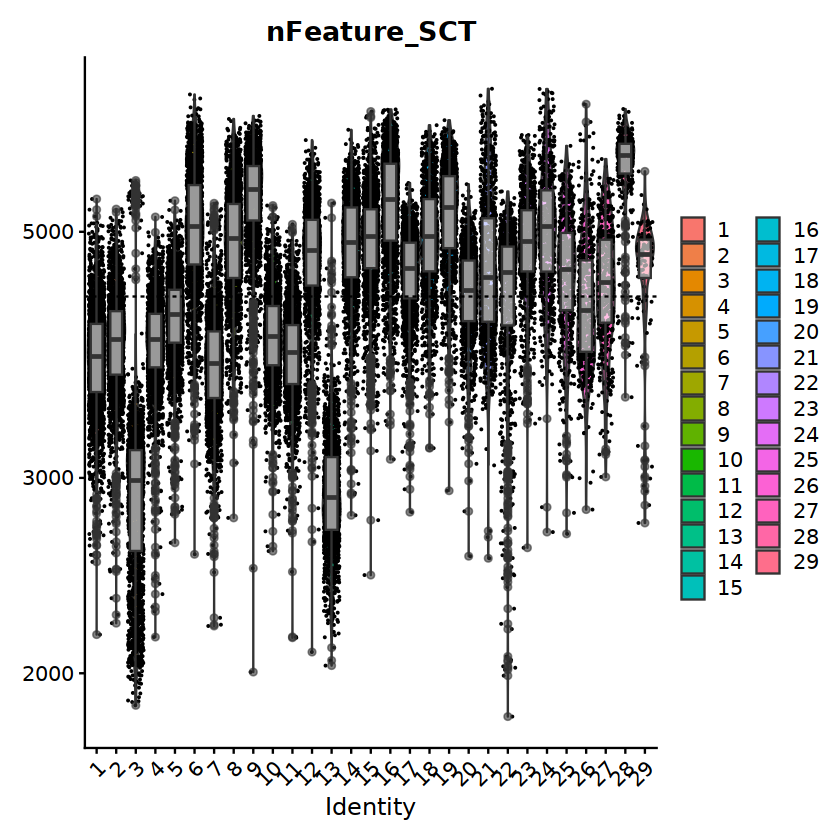

In [22]:
p10 <- VlnPlot(adata, features='nFeature_SCT', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$nFeature_SCT), linetype='dashed')


p10
setwd(path_graphs)
png(file='Vln_nFeature_SCT.png', width =2000, height = 500)
p10
dev.off()

## nCount_RNA

png 
  2

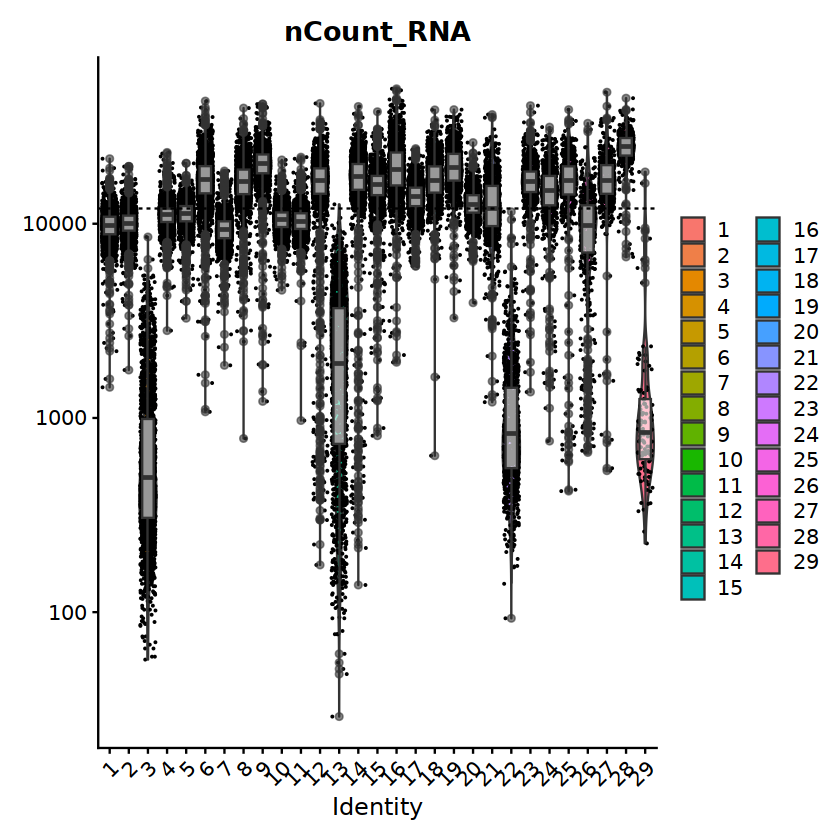

In [23]:
####

p10 <- VlnPlot(adata, features='nCount_RNA', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$nCount_RNA), linetype='dashed')


p10
setwd(path_graphs)
png(file='Vln_nCount_RNA.png', width =2000, height = 500)
p10
dev.off()

## nFeature_RNA

png 
  2

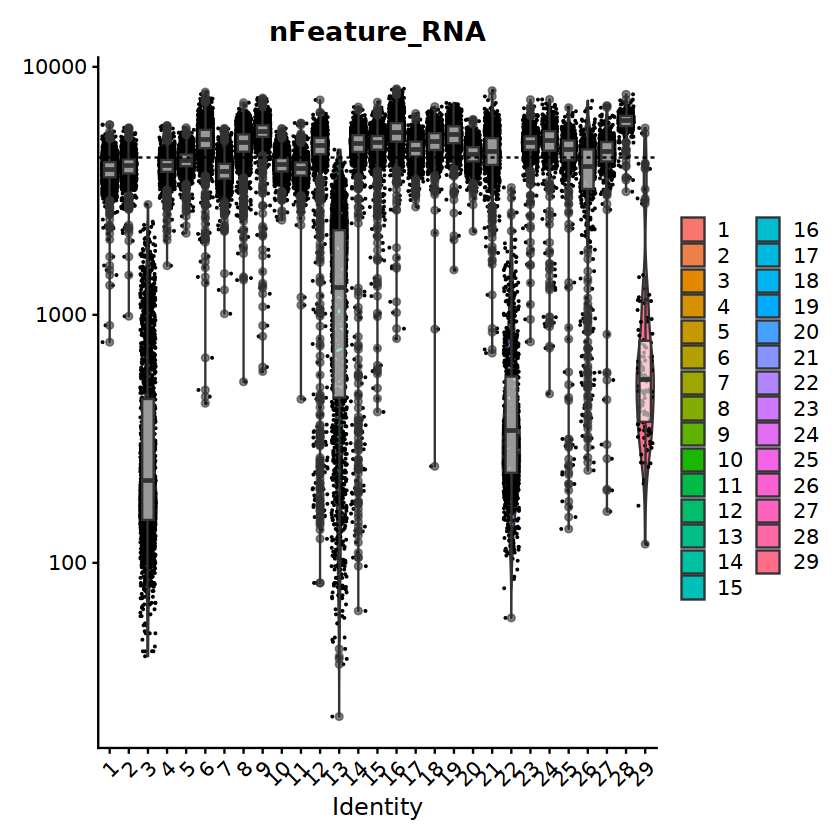

In [24]:
####

p10 <- VlnPlot(adata, features='nFeature_RNA', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$nFeature_RNA), linetype='dashed')


p10
setwd(path_graphs)
png(file='Vln_nFeature_RNA.png', width =2000, height = 500)
p10
dev.off()


## scDblFinder.score

png 
  2

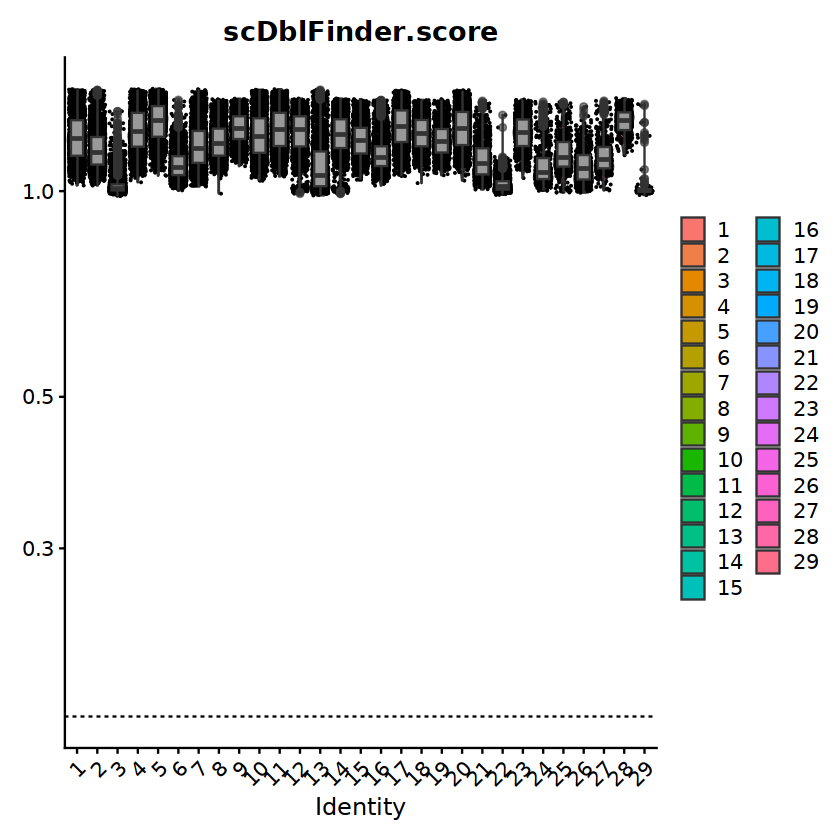

In [25]:
####

p10 <- VlnPlot(adata, features='scDblFinder.score', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$scDblFinder.score), linetype='dashed')


p10
setwd(path_graphs)
png(file='Vln_scDblFinder.score.png', width =2000, height = 500)
p10
dev.off()

# QC decisions

In [26]:
adata

An object of class Seurat 
101853 features across 36785 samples within 3 assays 
Active assay: SCT (29079 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 2 other assays present: RNA, RNA_raw
 2 dimensional reductions calculated: pca, umap.rna

In [27]:
###### Remove high mito content cells (more or equal to 10% mt genes ------------------
  
adata = subset(adata, subset = percent.mt < 10)

In [28]:
adata

An object of class Seurat 
101853 features across 36393 samples within 3 assays 
Active assay: SCT (29079 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 2 other assays present: RNA, RNA_raw
 2 dimensional reductions calculated: pca, umap.rna

# DECISION TO FILTER OUT CLUSTERS 13 and 29 based pc.mt and nFeatures SCT

In [39]:

adata3 = subset(adata, seurat_clusters!= 13)



adata3

An object of class Seurat 
101853 features across 35306 samples within 3 assays 
Active assay: SCT (29079 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 2 other assays present: RNA, RNA_raw
 2 dimensional reductions calculated: pca, umap.rna

In [40]:
rm(adata)

In [41]:
adata3 = subset(adata3, seurat_clusters!= 29)

In [42]:
adata3

An object of class Seurat 
101853 features across 35224 samples within 3 assays 
Active assay: SCT (29079 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 2 other assays present: RNA, RNA_raw
 2 dimensional reductions calculated: pca, umap.rna

# Save QC'ed object 

In [43]:
setwd("/scratch/manuel.tardaguila/hESC_MK_SCRNAseq_10X/no_competition/processing_outputs/")

In [44]:
saveRDS(adata3, file="merged_unprocessed_db_filt_clustered_QCed.rds")

# Post QC Violin graphs to decide if a cluster is lowQuality

## Percent.mt

png 
  2

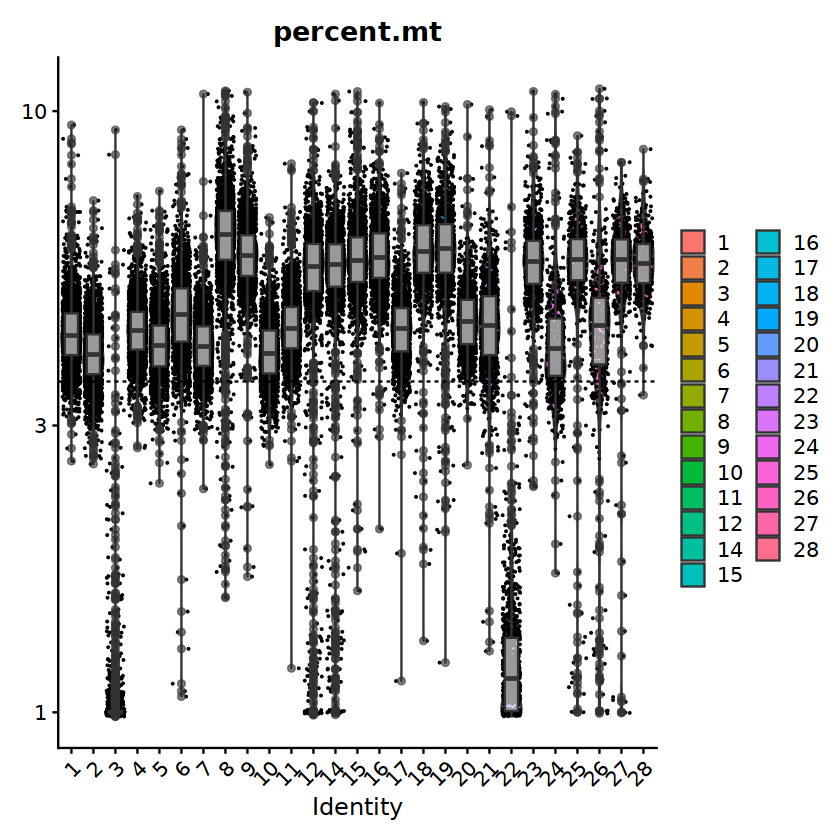

In [46]:
p10 <- VlnPlot(adata3, features='percent.mt', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata3$percent.mt), linetype='dashed')


p10
setwd(path_graphs)
png(file='Vln_percent_POST.mt.png', width =2000, height = 500)
p10
dev.off()

## nCount_SCT

png 
  2

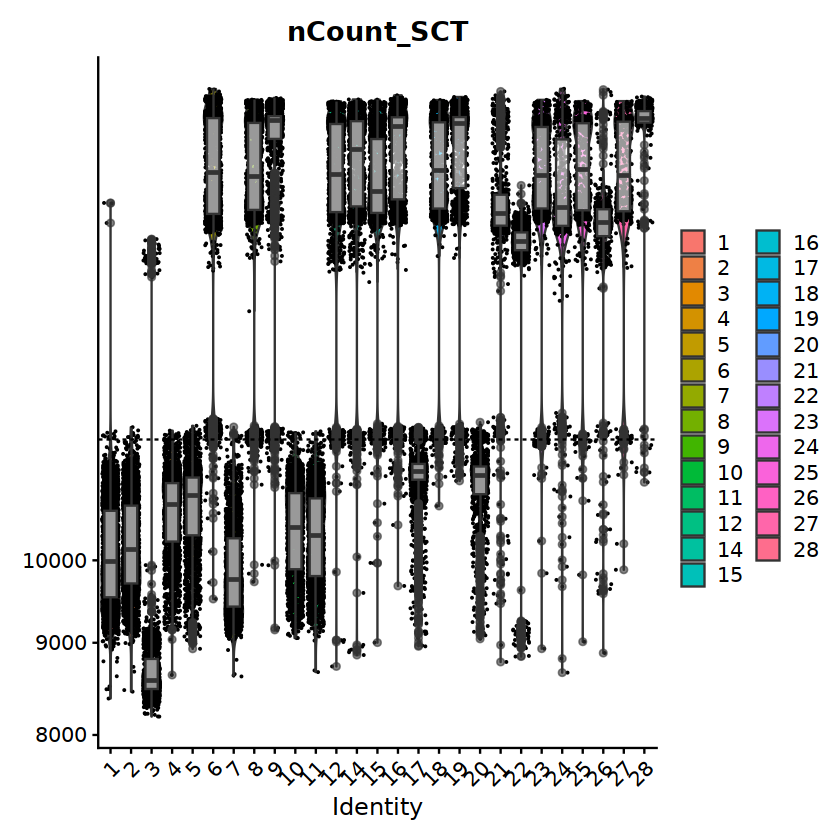

In [47]:
p10 <- VlnPlot(adata3, features='nCount_SCT', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata3$nCount_SCT), linetype='dashed')


p10
setwd(path_graphs)
png(file='Vln_nCount_SCT_POST.png', width =2000, height = 500)
p10
dev.off()

## nFeature_SCT

png 
  2

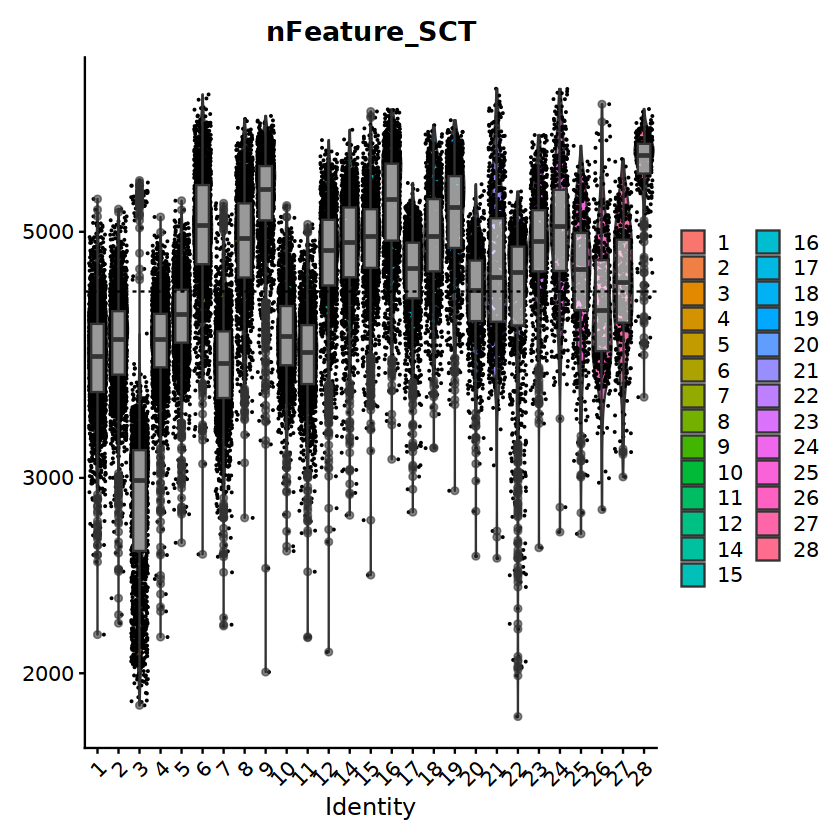

In [48]:
p10 <- VlnPlot(adata3, features='nFeature_SCT', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata3$nFeature_SCT), linetype='dashed')


p10
setwd(path_graphs)
png(file='Vln_nFeature_SCT_POST.png', width =2000, height = 500)
p10
dev.off()

## nCount_RNA

png 
  2

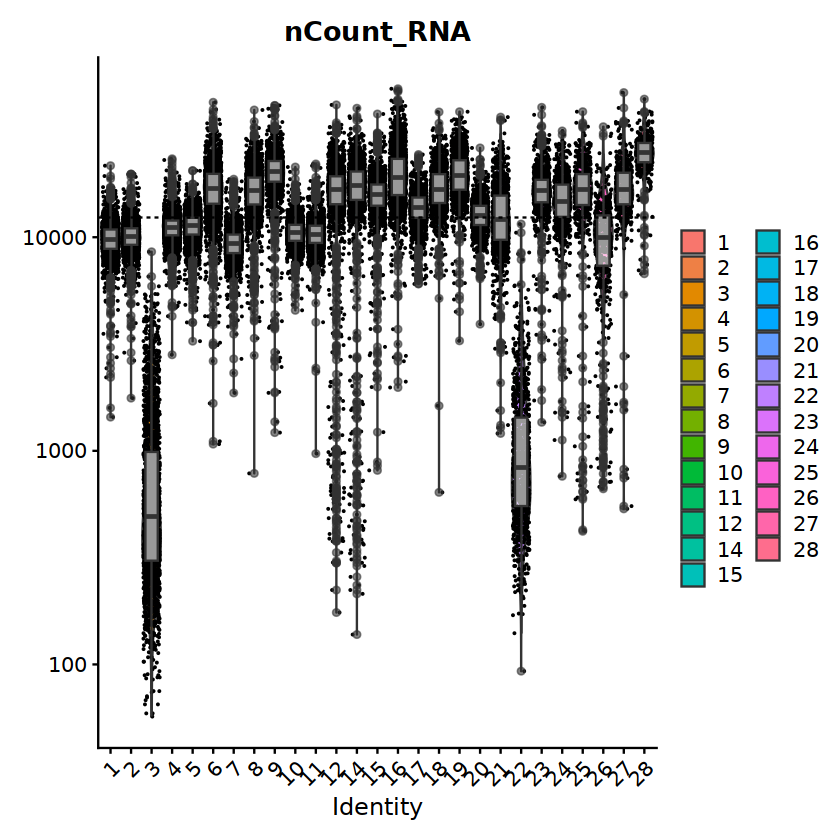

In [49]:
####

p10 <- VlnPlot(adata3, features='nCount_RNA', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata3$nCount_RNA), linetype='dashed')


p10
setwd(path_graphs)
png(file='Vln_nCount_RNA_POST.png', width =2000, height = 500)
p10
dev.off()

## nFeature_RNA

png 
  2

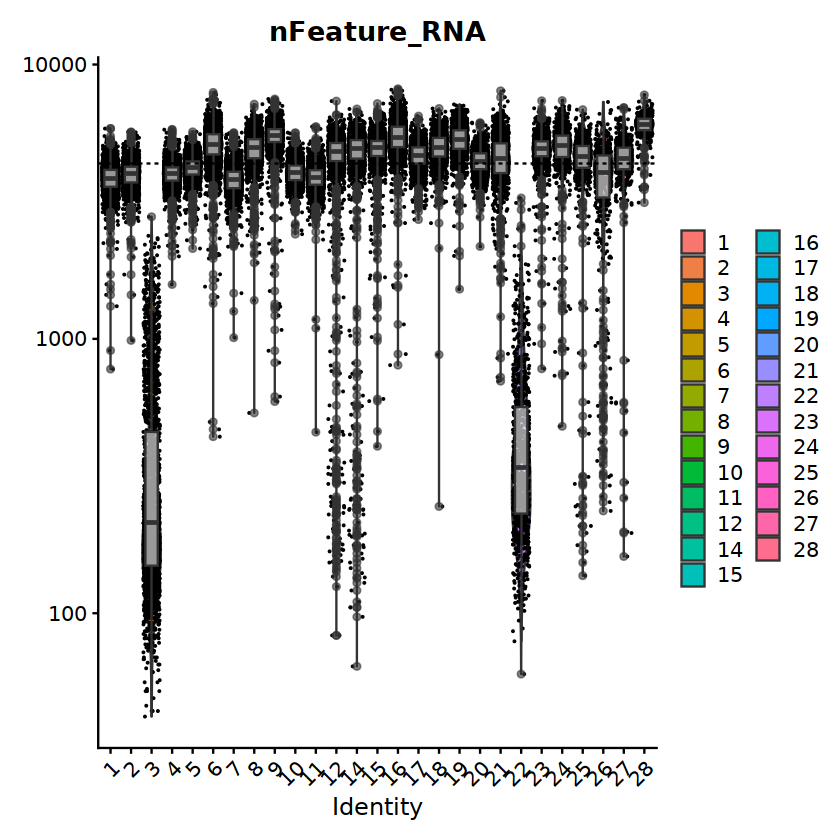

In [50]:
####

p10 <- VlnPlot(adata3, features='nFeature_RNA', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata3$nFeature_RNA), linetype='dashed')


p10
setwd(path_graphs)
png(file='Vln_nFeature_RNA_POST.png', width =2000, height = 500)
p10
dev.off()


## scDblFinder.score

png 
  2

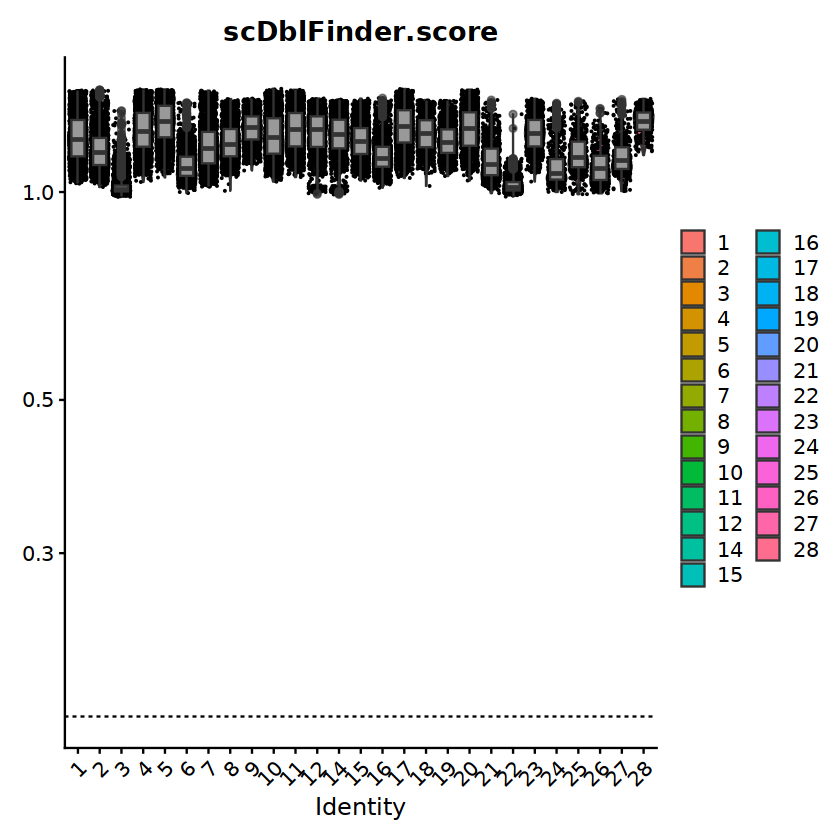

In [51]:
####

p10 <- VlnPlot(adata3, features='scDblFinder.score', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata3$scDblFinder.score), linetype='dashed')


p10
setwd(path_graphs)
png(file='Vln_scDblFinder.score_POST.png', width =2000, height = 500)
p10
dev.off()